In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2, os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
datadir = 'C:/Users/Niner/Desktop/Port/testing_data'
dimension = 180
batchsize = 10
categories = ['Benign', 'Malignant']

In [28]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split=0.3,
    seed=123,
    subset='training',
    image_size=(dimension, dimension),
    batch_size=batchsize
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split=0.2,
    seed=123,
    subset='validation',
    image_size=(dimension, dimension),
    batch_size=batchsize
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split=0.1,
    seed=123,
    subset='validation',
    image_size=(dimension, dimension),
    batch_size=batchsize
)

Found 60 files belonging to 2 classes.
Using 30 files for training.
Found 60 files belonging to 2 classes.
Using 30 files for validation.


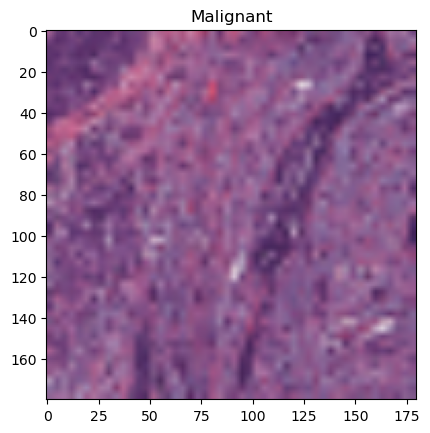

In [37]:
for image, label in train_ds.take(1):
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(categories[label[0].numpy().astype('uint8')])
    plt.show()

In [30]:
augmentation = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip('horizontal')
])

In [31]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate = 0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [32]:
model = keras.Sequential([
    augmentation,
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(dimension, dimension, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

In [38]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [39]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
3/3 [==============================] - 136s 32s/step - loss: 0.6162 - accuracy: 0.6667 - val_loss: 0.7237 - val_accuracy: 0.4333
Epoch 2/20
3/3 [==============================] - 79s 29s/step - loss: 0.7850 - accuracy: 0.6000 - val_loss: 0.5852 - val_accuracy: 0.8667
Epoch 3/20
3/3 [==============================] - 87s 33s/step - loss: 0.7518 - accuracy: 0.5333 - val_loss: 0.7964 - val_accuracy: 0.4333
Epoch 4/20
3/3 [==============================] - 80s 29s/step - loss: 0.5799 - accuracy: 0.6000 - val_loss: 0.5134 - val_accuracy: 0.8667
Epoch 5/20
3/3 [==============================] - 77s 28s/step - loss: 0.4920 - accuracy: 0.8667 - val_loss: 0.4202 - val_accuracy: 0.9667
Epoch 6/20
3/3 [==============================] - 78s 28s/step - loss: 0.3952 - accuracy: 0.9667 - val_loss: 0.3988 - val_accuracy: 0.9000
Epoch 7/20
3/3 [==============================] - 79s 29s/step - loss: 0.2752 - accuracy: 0.9333 - val_loss: 0.2791 - val_accuracy: 0.9667
Epoch 8/20
3/3 [==========

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 43, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 256)      

In [41]:
model.evaluate(train_ds)

3/3 [==============================] - 19s 6s/step - loss: 0.0198 - accuracy: 1.0000


[0.01979174092411995, 1.0]

In [42]:
model.evaluate(val_ds)

3/3 [==============================] - 38s 16s/step - loss: 0.1364 - accuracy: 0.9667


[0.1363615244626999, 0.9666666388511658]

In [43]:
model.evaluate(test_ds)

1/1 [==============================] - 6s 6s/step - loss: 0.0465 - accuracy: 1.0000


[0.0465240478515625, 1.0]

In [44]:
model.save('Breast-Cancer-Diagnosis-CNN.model')

INFO:tensorflow:Assets written to: Breast-Cancer-Diagnosis-CNN.model\assets


INFO:tensorflow:Assets written to: Breast-Cancer-Diagnosis-CNN.model\assets
